In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir(r'C:\Users\Aaron Cherian\Documents\Python Scripts')

In [3]:
data_train = pd.read_csv('train_selected.csv')
data_train.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


In [4]:
X_train = data_train.drop(['id', 'ttf', 'label_bnc'],axis=1).values
y_train = data_train['ttf'].values
X_train

array([[1.00000e+00, 1.40060e+03, 5.54360e+02, 4.74700e+01, 5.21660e+02],
       [2.00000e+00, 1.40314e+03, 5.53750e+02, 4.74900e+01, 5.22280e+02],
       [3.00000e+00, 1.40420e+03, 5.54260e+02, 4.72700e+01, 5.22420e+02],
       ...,
       [1.98000e+02, 1.42818e+03, 5.50940e+02, 4.80900e+01, 5.20010e+02],
       [1.99000e+02, 1.42653e+03, 5.50680e+02, 4.83900e+01, 5.19670e+02],
       [2.00000e+02, 1.43214e+03, 5.50790e+02, 4.82000e+01, 5.19300e+02]])

In [5]:
data_test = pd.read_csv('test.csv')
data_test.head()

,id,cycle,s1,s2,s3,s4,av1,av2,av3,av4,sd1,sd2,sd3,sd4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,1398.91,554.42,47.23,521.79,0.0,0.0,0.0,0.0,112,0
1,2,49,1410.83,553.52,47.67,521.74,1410.83,553.52,47.67,521.74,0.0,0.0,0.0,0.0,98,0
2,3,126,1418.89,552.59,47.88,520.83,1418.89,552.59,47.88,520.83,0.0,0.0,0.0,0.0,69,0
3,4,106,1406.88,552.64,47.65,521.88,1406.88,552.64,47.65,521.88,0.0,0.0,0.0,0.0,82,0
4,5,98,1419.36,553.29,47.46,521.00,1419.36,553.29,47.46,521.00,0.0,0.0,0.0,0.0,91,0


In [6]:
X_test = data_test.drop(['id', 'ttf', 'label_bnc', 'av1', 'av2', 'av3', 'av4', 'sd1', 'sd2', 'sd3', 'sd4'],axis=1).values
y_test = data_test['ttf'].values
X_test

array([[  31.  , 1398.91,  554.42,   47.23,  521.79],
       [  49.  , 1410.83,  553.52,   47.67,  521.74],
       [ 126.  , 1418.89,  552.59,   47.88,  520.83],
       [ 106.  , 1406.88,  552.64,   47.65,  521.88],
       [  98.  , 1419.36,  553.29,   47.46,  521.  ],
       [ 105.  , 1404.49,  553.73,   47.51,  521.56],
       [ 160.  , 1413.57,  553.42,   47.32,  522.32],
       [ 166.  , 1413.89,  553.51,   47.59,  520.53],
       [  55.  , 1410.27,  552.58,   47.58,  521.65],
       [ 192.  , 1398.99,  552.88,   47.59,  521.82],
       [  83.  , 1414.22,  552.8 ,   47.67,  520.74],
       [ 217.  , 1409.64,  553.36,   47.37,  522.03],
       [ 195.  , 1414.51,  553.28,   47.52,  521.3 ],
       [  46.  , 1408.35,  553.75,   47.57,  520.66],
       [  76.  , 1400.61,  554.08,   47.25,  522.12],
       [ 113.  , 1401.  ,  554.6 ,   47.37,  521.77],
       [ 165.  , 1412.54,  553.49,   47.55,  521.52],
       [ 133.  , 1419.18,  553.36,   47.7 ,  521.06],
       [ 135.  , 1406.32,  5

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly.fit(X_train_poly, y_train)

#print(np.size(X_train_poly))
X_train_poly




array([[1.00000000e+00, 1.00000000e+00, 1.40060000e+03, ...,
        1.17550911e+06, 1.29179710e+07, 1.41958895e+08],
       [1.00000000e+00, 2.00000000e+00, 1.40314000e+03, ...,
        1.17789814e+06, 1.29541512e+07, 1.42465657e+08],
       [1.00000000e+00, 3.00000000e+00, 1.40420000e+03, ...,
        1.16732288e+06, 1.29010540e+07, 1.42580254e+08],
       ...,
       [1.00000000e+00, 1.98000000e+02, 1.42818000e+03, ...,
        1.20260014e+06, 1.30040361e+07, 1.40616112e+08],
       [1.00000000e+00, 1.99000000e+02, 1.42653000e+03, ...,
        1.21685517e+06, 1.30680538e+07, 1.40340474e+08],
       [1.00000000e+00, 2.00000000e+02, 1.43214000e+03, ...,
        1.20645853e+06, 1.29982140e+07, 1.40040924e+08]])

In [9]:
linreg = LinearRegression()

In [10]:
linreg.fit(X_test_poly, y_test)

LinearRegression()

In [11]:
y_pred_poly = linreg.predict(X_test_poly)
print(y_pred_poly)

[113.10453033  92.1131134   41.21202469  81.41281128  98.2991066
  97.96935654  93.24797821  98.67747498 112.21392822 105.67556
  84.0654335  121.61132812  88.26760101 106.1255455  115.67808533
 102.30443573  64.31204224  36.16517258  90.97348022  22.81225967
  75.28392792 124.53623962 104.36171722  18.29568481 132.19041443
 106.63892365  90.20953751  83.91181183 115.85253906  80.37617493
  14.56529999  56.5030098  107.1287384    3.98169708  10.24302673
  30.13877869  53.66496277  45.495224   143.93034363  24.30142212
  34.78798676  13.45729446  38.19554138 106.03495789  94.44327545
  52.16189575 135.17491913  88.87236404  26.55599213  93.25008392
  93.27228928  66.7888031   29.99734879  86.71298218 115.65753174
  13.92718506  96.828125    26.63884735 124.74353409 104.17497635
  44.04206848  50.5336113   56.8692627   44.18750763 129.26356888
  21.48690414  66.55908966  25.7699585  126.37414932  91.68561554
 119.08544922  59.28614044 111.18567657 120.22568512 100.86476135
  19.82113647 

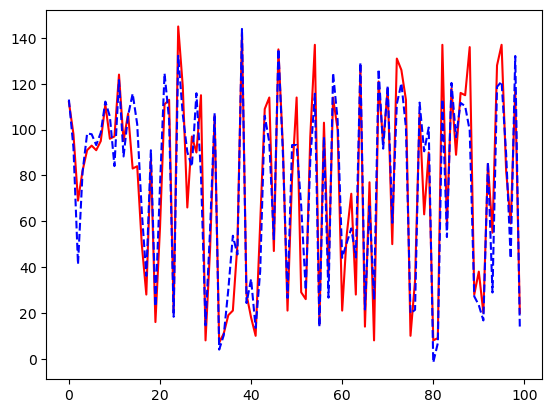

In [12]:
import matplotlib.pyplot as plt
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'Observed', color= 'r', linestyle='-')
plt.plot(x_ax,y_pred_poly,label = 'Predicted', color= 'b', linestyle='--')
plt.show()

In [13]:
#Performance metrics - Polynomial Regression - rmse
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_poly, squared=False)
rmse

13.869227125620782

In [14]:
#Performance metrics - Polynomial Regression - r squared
from sklearn.metrics import r2_score
R_square = r2_score(y_test, y_pred_poly)
R_square

0.8886103148367107

In [15]:
#Performance metrics - Polynomial Regression - mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_poly)
mse

192.35546106205527

In [16]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [17]:
#Predicting Values
y_pred_reg = regressor.predict(X_test)
y_pred_reg

array([179.052, 153.69 ,  39.572,  76.036, 100.53 ,  94.524,  91.166,
        65.806, 150.882,  96.89 ,  93.608, 103.934,  68.422, 165.85 ,
       165.204, 128.36 ,  71.162,  51.852,  89.052,  15.74 ,  93.248,
       174.332, 124.832,  58.082, 166.072, 120.284,  88.19 ,  79.606,
       104.996,  71.326,  21.462,  89.554, 130.206,   5.15 ,   6.958,
        27.01 ,  53.418,  73.242, 179.562,  22.432,  67.464,  23.252,
        42.36 , 147.312,  71.728,  57.362, 106.134, 122.79 ,  27.366,
       131.544,  86.242,  57.74 ,  47.978, 126.766,  96.582,  13.078,
        69.774,  42.408, 137.282,  85.846,  48.986,  90.538,  52.412,
        40.084, 149.182,  22.616, 135.274,  12.326, 154.2  ,  66.982,
       156.196,  83.706, 130.234,  78.45 , 104.168,  15.278,  27.002,
       151.862,  88.64 ,  79.058,   6.306,   9.076, 149.966,  63.622,
       161.278,  92.222, 151.266, 134.882,  83.314,  37.018,  23.582,
        16.486,  45.968,  34.704, 126.772, 143.768,  86.188,  71.91 ,
       132.564,  24.

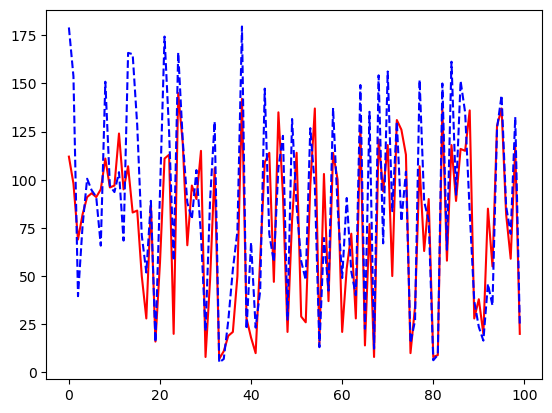

In [19]:
#Plotting actual vs Predicted Values
import matplotlib.pyplot as plt
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'Observed', color= 'r', linestyle='-')
plt.plot(x_ax,y_pred_reg,label = 'Predicted', color= 'b', linestyle='--')
plt.show()

In [20]:
#Performance metrics - - Random Forest Regression -  rmse
from sklearn.metrics import mean_squared_error
rmse_rf = mean_squared_error(y_test, y_pred_reg, squared=False)
rmse_rf

28.98923121712613

In [21]:
#Performance metrics - Random Forest Regression - r square
from sklearn.metrics import r2_score
R_square_rf = r2_score(y_test, y_pred_reg)
R_square_rf

0.5133532221772853

In [22]:
#Performance metrics - - Random Forest Regression - mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_reg)
mse

840.37552656